# GEQIE MCQI Example

## Setup

### Imports

In [9]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [10]:
import geqie
from geqie.encodings import mcqi

## Encoding

### Opening the image

In [11]:
image = Image.open("../../assets/test_images/rgb/rgb4x4.png")
image = np.asarray(image)

(4, 4, 3)

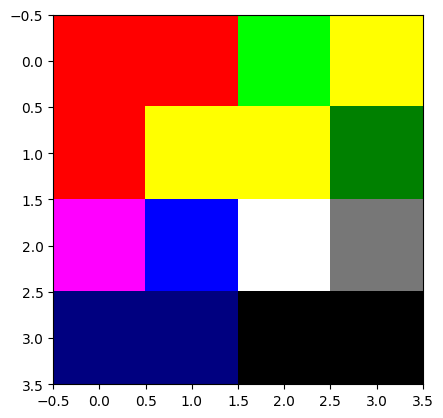

In [12]:
plt.imshow(image)
image.shape

### Encoding using unitary gate

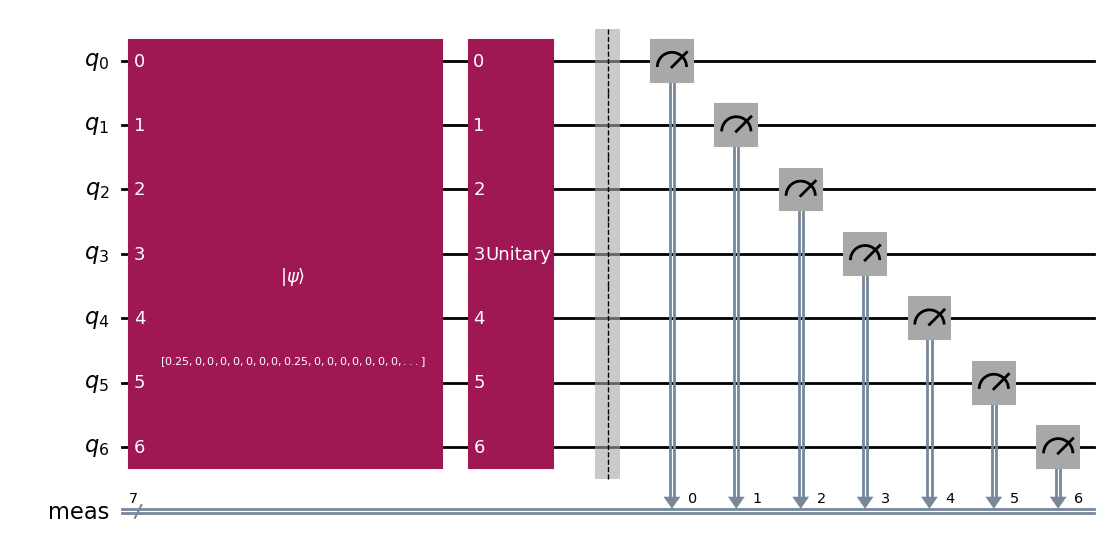

In [13]:
circuit = geqie.encode(mcqi.init_function, mcqi.data_function, mcqi.map_function, image)
circuit.draw(output="mpl")

### Simulating the circuit

In [14]:
result = geqie.simulate(circuit, 1000)

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{RGB\_color}^{\otimes 8}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Last 3 qubits corresponds to color intensity, for each channel, where:
    - $\ket{position}\ket{00}\ket{1}$ - red channel is bright;
    - $\ket{position}\ket{00}\ket{0}$ - red channel is dark;
    - $\ket{position}\ket{01}\ket{1}$ - green channel is bright;
    - $\ket{position}\ket{01}\ket{0}$ - green channel is dark;
    - $\ket{position}\ket{10}\ket{1}$ - blue channel is bright;
    - $\ket{position}\ket{10}\ket{0}$ - blue channel is dark;

In [15]:
ones = np.zeros_like(image)
total = np.zeros_like(image)

for state, n in result.items():
    if n > 0:
        x = state[0:2]
        y = state[2:4]
        x_dec = int(x, base=2)
        y_dec = int(y, base=2)
        c = state[4:7]

        # if Red:
        if c[0:2] == "00":
            if c[-1] == "1":
                ones[x_dec, y_dec, 0] = n
            total[x_dec, y_dec, 0] += n
        # if Green:
        if c[0:2] == "01":
            if c[-1] == "1":
                ones[x_dec, y_dec, 1] = n
            total[x_dec, y_dec, 1] += n
        # if Blue:
        if c[0:2] == "10":
            if c[-1] == "1":
                ones[x_dec, y_dec, 2] = n
            total[x_dec, y_dec, 2] += n
        
reconstructed_image = ones / total

print("Original image (Red channel):")
print(image[:,:,0])
print("Reconstructed image (Red channel):")
print(f"{reconstructed_image[:,:,0]}")

Original image (Red channel):
[[255 255   0 255]
 [255 255 255   0]
 [255   0 255 119]
 [  0   0   0   0]]
Reconstructed image (Red channel):
[[1.   1.   0.   1.  ]
 [1.   1.   1.   0.  ]
 [1.   0.   1.   0.44]
 [0.   0.   0.   0.  ]]


### Reconstructed image

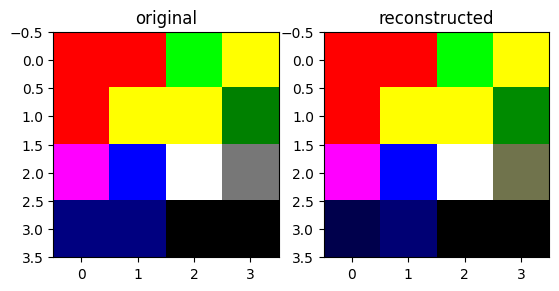

In [16]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(reconstructed_image)